In [1]:
import time
import matplotlib.pyplot as plt

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [3]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 2000
generations = 100
mutation_rate = 0.1
crossover_probability = 0.7
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, mutation_rate, crossover_probability)

# Run optimzation and write to file

solution = ga.solve_tsp(tsp_data)
improvement = ga.population_fitness
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

Generation  1
Generation  2
Generation  3
Generation  4
Generation  5
Generation  6
Generation  7
Generation  8
Generation  9
Generation  10
Generation  11
Generation  12
Generation  13
Generation  14
Generation  15
Generation  16
Generation  17
Generation  18
Generation  19
Generation  20
Generation  21
Generation  22
Generation  23
Generation  24
Generation  25
Generation  26
Generation  27
Generation  28
Generation  29
Generation  30
Generation  31
Generation  32
Generation  33
Generation  34
Generation  35
Generation  36
Generation  37
Generation  38
Generation  39
Generation  40
Generation  41
Generation  42
Generation  43
Generation  44
Generation  45
Generation  46
Generation  47
Generation  48
Generation  49
Generation  50
Generation  51
Generation  52
Generation  53
Generation  54
Generation  55
Generation  56
Generation  57
Generation  58
Generation  59
Generation  60
Generation  61
Generation  62
Generation  63
Generation  64
Generation  65
Generation  66
Generation  67
Gene

[10570692, 9148192, 8304558, 7612484, 6966204, 6378494, 5708566, 5172788, 4688090, 4293032, 3930462, 3725910, 3536034, 3301114, 3206564, 3084494, 3022494, 3045032, 3101624, 3042152, 2947144, 2953372, 2992794, 2985282, 2955022, 2999432, 3033676, 2982668, 2996030, 3036586, 3010704, 2974722, 2928728, 2969200, 2980790, 3015682, 2985904, 2920698, 2998598, 2897644, 3015794, 2990148, 2974052, 2972812, 2994940, 3047362, 2947538, 3167000, 3031556, 2897180, 2970536, 3031148, 2959134, 2954036, 3004554, 2983970, 2985088, 3010818, 2999956, 2899592, 3026012, 2978432, 2970344, 3021650, 2969504, 3003062, 2922902, 2885138, 2935330, 2944092, 2929832, 2991778, 3016910, 2951476, 3051302, 2949152, 2972528, 2929362, 2870542, 2991620, 3010276, 3030668, 2981350, 2924682, 2983214, 2988244, 3000084, 2933020, 2957534, 2920584, 2936300, 3014920, 3036362, 3034828, 2942380, 2972660, 2958526, 2976484, 2952354, 2896124, 2923860]


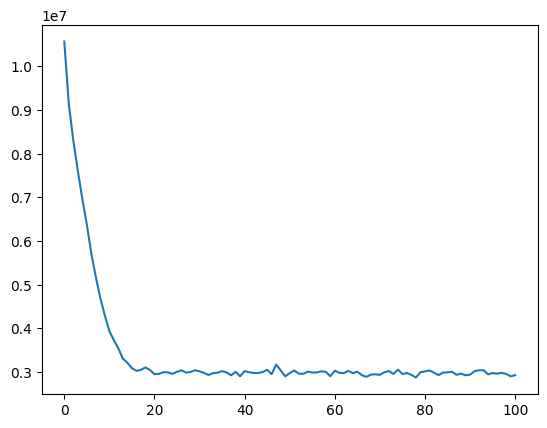

In [4]:
import matplotlib.pyplot as plt
import numpy as np
print(improvement)
plt.plot(improvement)
plt.show()

In [5]:
best = ga.population.take_best_chromosome()
print(best.get_products())
print(best.get_score())

[ 1  2  7  5 14 16  4  9 18  8 10 15 12 13  6 11  3 17]
1325


In [6]:
print(tsp_data.get_distances())
print(tsp_data.get_start_distances())
print(tsp_data.get_end_distances())

[[0, 69, 698, 240, 132, 527, 156, 459, 374, 409, 599, 428, 483, 167, 425, 221, 691, 465], [69, 0, 647, 189, 81, 476, 105, 408, 323, 358, 548, 377, 432, 116, 374, 170, 640, 414], [698, 647, 0, 472, 568, 185, 596, 345, 324, 289, 105, 270, 237, 531, 283, 491, 183, 351], [240, 189, 472, 0, 110, 301, 138, 233, 148, 183, 373, 202, 257, 73, 199, 19, 465, 239], [132, 81, 568, 110, 0, 397, 36, 329, 244, 279, 469, 298, 353, 37, 295, 91, 561, 335], [527, 476, 185, 301, 397, 0, 425, 174, 153, 118, 86, 99, 66, 360, 112, 320, 178, 180], [156, 105, 596, 138, 36, 425, 0, 357, 272, 307, 497, 326, 381, 65, 323, 119, 589, 363], [459, 408, 345, 233, 329, 174, 357, 0, 85, 56, 246, 75, 130, 292, 72, 252, 338, 26], [374, 323, 324, 148, 244, 153, 272, 85, 0, 35, 225, 54, 109, 207, 51, 167, 317, 91], [409, 358, 289, 183, 279, 118, 307, 56, 35, 0, 190, 19, 74, 242, 16, 202, 282, 62], [599, 548, 105, 373, 469, 86, 497, 246, 225, 190, 0, 171, 138, 432, 184, 392, 98, 252], [428, 377, 270, 202, 298, 99, 326, 75, 54

In [7]:
from GeneticAlgorithm import Chromosome
from GeneticAlgorithm import Population

chromosome = Chromosome()
chromosome.create_chromosome(4)
print(chromosome.products)
distances = [
    [0, 1, 3, 6],
    [5, 0, 3, 2],
    [9, 4, 0, 8],
    [2, 6, 7 ,0]
]
# print(chromosome.fitness_function(distances))

population = Population(0.1, 0.7, tsp_data)
population.create_random_population(population_size, len(tsp_data.get_start_distances()))
print(population.chromosomes)
print(population.calculate_population_fitness())
print(ga.roulette(population))

[3 4 1 2]
[<GeneticAlgorithm.Chromosome object at 0x0000015170706D90>, <GeneticAlgorithm.Chromosome object at 0x0000015170710A90>, <GeneticAlgorithm.Chromosome object at 0x00000151706ADD60>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD970>, <GeneticAlgorithm.Chromosome object at 0x00000151706ADDC0>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD4C0>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD550>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD610>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD8B0>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD580>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD700>, <GeneticAlgorithm.Chromosome object at 0x00000151706ADE80>, <GeneticAlgorithm.Chromosome object at 0x00000151706ADFA0>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD490>, <GeneticAlgorithm.Chromosome object at 0x00000151706AD730>, <GeneticAlgorithm.Chromosome object at 0x00000151706ADD90>, <GeneticAlgorithm.Chromosome 

AttributeError: 'GeneticAlgorithm' object has no attribute 'roulette'

### Part 2: Path Finding Through Ant Colony Optimization

In [7]:
# Please keep your parameters for the ACO easily changeable here
no_ants = 30
no_gen = 50
q = 500
evap = 0.4
# custom parameters
straight_factor = 1.5
max_steps = 1000000

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")
from Coordinate import Coordinate

spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, straight_factor, max_steps)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

Ready reading maze file ./../data/hard_maze.txt
generation:  1 , best route:  1047 , avg route:  1216.8
generation:  2 , best route:  1025 , avg route:  1189.5333333333333
generation:  3 , best route:  939 , avg route:  1148.8
generation:  4 , best route:  973 , avg route:  1183.0
generation:  5 , best route:  983 , avg route:  1173.6
generation:  6 , best route:  1017 , avg route:  1181.0
generation:  7 , best route:  965 , avg route:  1145.8666666666666
generation:  8 , best route:  933 , avg route:  1175.4666666666667
generation:  9 , best route:  989 , avg route:  1177.2666666666667
generation:  10 , best route:  967 , avg route:  1135.9333333333334
generation:  11 , best route:  977 , avg route:  1160.4666666666667
generation:  12 , best route:  987 , avg route:  1142.9333333333334
generation:  13 , best route:  969 , avg route:  1157.8666666666666
generation:  14 , best route:  977 , avg route:  1169.8666666666666
generation:  15 , best route:  915 , avg route:  1152.533333333333

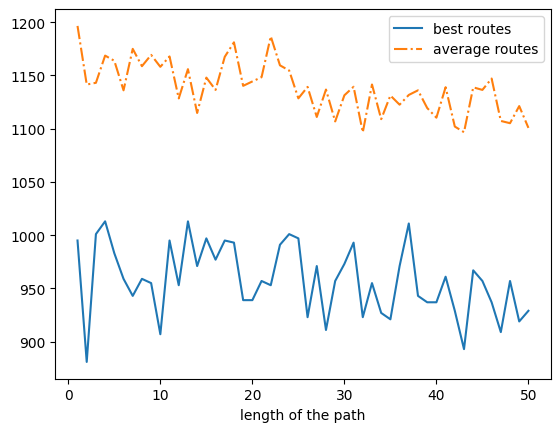

In [5]:
plt.plot(list(range(1, no_gen + 1)), list(map(lambda x: x.size(), best_routes)), label="best routes")
plt.plot(list(range(1, no_gen + 1)), avg_routes, '-.', label="average routes")

plt.xlabel("generation")
plt.xlabel("length of the path")

plt.legend()
plt.show()

In [6]:
for i in range(maze.length):
    for j in range(maze.width): 
      v = maze.pheromones[j][i]
      if (v < 10):  print(int(v), end="   | ")
      elif (v < 100):  print(int(v), end="  | ")
      else: print(int(v), end=" | ")
    print()

0   | 45  | 45  | 45  | 45  | 45  | 0   | 36  | 36  | 36  | 0   | 8   | 8   | 8   | 8   | 21  | 18  | 24  | 17  | 24  | 16  | 28  | 23  | 23  | 0   | 45  | 45  | 45  | 45  | 45  | 6   | 6   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 1   | 1   | 2   | 2   | 1   | 2   | 2   | 2   | 2   | 1   | 1   | 0   | 1   | 2   | 2   | 2   | 2   | 1   | 2   | 2   | 1   | 
0   | 0   | 0   | 0   | 0   | 45  | 0   | 36  | 0   | 36  | 0   | 8   | 0   | 0   | 0   | 16  | 0   | 13  | 0   | 15  | 0   | 17  | 0   | 23  | 0   | 45  | 0   | 0   | 0   | 38  | 0   | 6   | 0   | 6   | 6   | 6   | 0   | 6   | 6   | 6   | 0   | 2   | 2   | 2   | 2   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 2   | 2   | 1   | 1   | 1   | 1   | 2   | 2   | 2   | 1   | 1   | 1   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 1   | 0   | 1   | 2   | 2   | 2   | 2   | 2   | 
0   | 0   | 0   | 0   | 0   | 45  | 0 

### Synthesis

In [ ]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")

Ready reading maze file ./../data/hard_maze.txt
generation:  0 , best route:  0 , avg route:  0.0
generation:  0 , best route:  91 , avg route:  91.0
generation:  0 , best route:  1222 , avg route:  1222.0
generation:  0 , best route:  522 , avg route:  522.0
generation:  0 , best route:  218 , avg route:  218.0
generation:  0 , best route:  849 , avg route:  849.0
generation:  0 , best route:  282 , avg route:  282.0
generation:  0 , best route:  625 , avg route:  625.0
generation:  0 , best route:  508 , avg route:  508.0
generation:  0 , best route:  711 , avg route:  711.0
generation:  0 , best route:  1077 , avg route:  1077.0
generation:  0 , best route:  600 , avg route:  600.0
generation:  0 , best route:  913 , avg route:  913.0
generation:  0 , best route:  269 , avg route:  269.0
generation:  0 , best route:  683 , avg route:  683.0
generation:  0 , best route:  463 , avg route:  463.0
generation:  0 , best route:  1211 , avg route:  1211.0
generation:  0 , best route:  1079

FileNotFoundError: [Errno 2] No such file or directory: './../tmp/my_tsp'